## VaR95 Saham Produktif

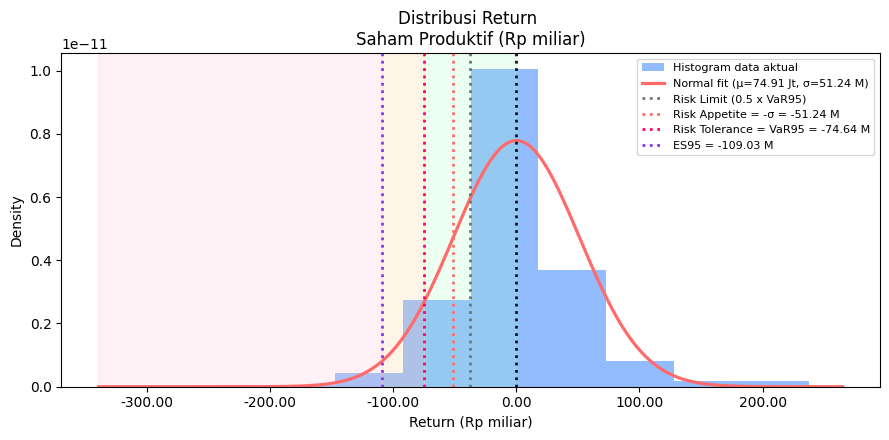

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm

# =========================
# 1. DATA & SETTINGS
# =========================

file_path = "PL_instruments.xlsx"      # ganti sesuai file
df = pd.read_excel(file_path)

ASSET_COL  = "PL_Saham_Produktif"               # ganti dengan nama kolom PL
ASSET_NAME = "Saham Produktif"                  # nama untuk judul

if ASSET_COL not in df.columns:
    raise ValueError(f"Kolom {ASSET_COL} tidak ditemukan di file Excel.")

series = df[ASSET_COL].dropna()

# =========================
# 2. METRIK RISIKO (α = 5%)
# =========================

alpha = 0.95
mu = series.mean()
sigma = series.std(ddof=1)

# VaR95 di ruang PL (5% kiri; biasanya negatif)
q05 = series.quantile(1 - alpha)

# Expected Shortfall 95%
losses = -series
loss_q95 = np.quantile(losses, alpha)
ES95_loss = losses[losses >= loss_q95].mean()
ES95_pl = -ES95_loss

# =========================
# 3. FORMAT Rp MILIAR
# =========================

def miliar_number(x: float) -> str:
    """Konversi rupiah ke 'Rp miliar' (dalam string, 2 desimal)."""
    return f"{x / 1e9:,.2f}"

def juta_number(x: float) -> str:
    """Konversi rupiah ke 'Rp juta' (dalam string, 2 desimal)."""
    return f"{x / 1e6:,.2f}"

axis_fmt = FuncFormatter(lambda val, pos: miliar_number(val))

# =========================
# 4. PALET WARNA
# =========================

hist_color   = "#3a86ff"
fit_color    = "#ff6b6b"
bau_color    = "#a5ffbd"   # BAU zone
ul_color     = "#ffd6a5"   # UL zone
tail_color   = "#ffc8dd"   # Tail Loss zone
var_color    = "#ff006e"
es_color     = "#8338ec"
mean_color   = "#6c757d"
sigma_color  = "#09131b"

# =========================
# 5. PLOT
# =========================

x_min = series.min()
x_max = series.max()
x_range = x_max - x_min
pad_left = x_min - 0.05 * x_range
pad_right = x_max + 0.05 * x_range

x = np.linspace(pad_left, pad_right, 400)
y = norm.pdf(x, mu, sigma)

fig, ax = plt.subplots(figsize=(9, 4.5))

# Histogram
ax.hist(series,
        bins=10,
        density=True,
        alpha=0.55,
        color=hist_color,
        label="Histogram data aktual")

# Normal fit
ax.plot(x, y,
        linewidth=2.3,
        color=fit_color,
        label=f"Normal fit (μ={juta_number(mu)} Jt, σ={miliar_number(sigma)} M)")

# Garis 0
ax.axvline(0,
           linestyle=":",
           linewidth=2,
           color=sigma_color,
           )

# Garis Risk Limit = 0.5 x q05
ax.axvline(0.5*q05,
           linestyle=":",
           linewidth=2,
           color=mean_color,
           label=f"Risk Limit (0.5 x VaR95)")

# Garis Risk Appetite = -σ
ax.axvline(-sigma,
           linestyle=":",
           linewidth=2,
           color=fit_color,
           label=f"Risk Appetite = -σ = -{miliar_number(sigma)} M")

# Garis VaR95
ax.axvline(q05,
           linestyle=":",
           linewidth=2,
           color=var_color,
           label=f"Risk Tolerance = VaR95 = {miliar_number(q05)} M")

# Garis ES95
ax.axvline(ES95_pl,
           linestyle=":",
           linewidth=2,
           color=es_color,
           label=f"ES95 = {miliar_number(ES95_pl)} M")

# === ZONA Expected Loss ===
RT_left  = q05
RT_right = 0
ax.axvspan(RT_left, RT_right,
           alpha=0.20,
           color=bau_color,
           )

# === ZONA UL: dari VaR95 ke ES95 ===
ul_left  = ES95_pl
ul_right = q05
ax.axvspan(ul_left, ul_right,
           alpha=0.25,
           color=ul_color,
           )

# === ZONA TAIL LOSS: dari ES95 ke arah kerugian yang lebih dalam ===
# (diasumsikan tail kerugian di sisi kiri, ES95_pl < q05 < mu)
tail_left  = pad_left
tail_right = ES95_pl
ax.axvspan(tail_left, tail_right,
           alpha=0.25,
           color=tail_color,
           )

# Sumbu x dalam Rp miliar
ax.xaxis.set_major_formatter(axis_fmt)

ax.set_title(f"Distribusi Return \n{ASSET_NAME} (Rp miliar)")
ax.set_xlabel("Return (Rp miliar)")
ax.set_ylabel("Density")
ax.grid(False)
ax.legend(fontsize=8, frameon=True)
plt.tight_layout()
plt.show()

## VaR95 Fixed Income

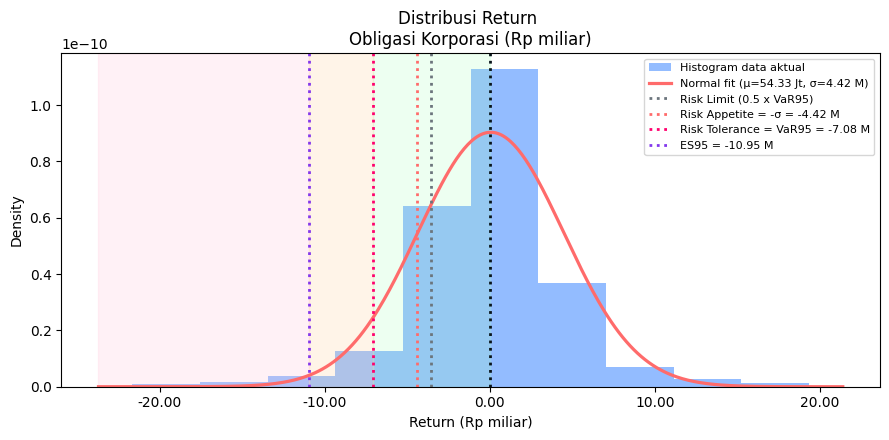

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm

# =========================
# 1. DATA & SETTINGS
# =========================

file_path = "PL_instruments.xlsx"      # ganti sesuai file
df = pd.read_excel(file_path)

ASSET_COL  = "PL_FI"               # ganti dengan nama kolom PL
ASSET_NAME = "Obligasi Korporasi"                  # nama untuk judul

if ASSET_COL not in df.columns:
    raise ValueError(f"Kolom {ASSET_COL} tidak ditemukan di file Excel.")

series = df[ASSET_COL].dropna()

# =========================
# 2. METRIK RISIKO (α = 5%)
# =========================

alpha = 0.95
mu = series.mean()
sigma = series.std(ddof=1)

# VaR95 di ruang PL (5% kiri; biasanya negatif)
q05 = series.quantile(1 - alpha)

# Expected Shortfall 95%
losses = -series
loss_q95 = np.quantile(losses, alpha)
ES95_loss = losses[losses >= loss_q95].mean()
ES95_pl = -ES95_loss

# =========================
# 3. FORMAT Rp MILIAR
# =========================

def miliar_number(x: float) -> str:
    """Konversi rupiah ke 'Rp miliar' (dalam string, 2 desimal)."""
    return f"{x / 1e9:,.2f}"

def juta_number(x: float) -> str:
    """Konversi rupiah ke 'Rp juta' (dalam string, 2 desimal)."""
    return f"{x / 1e6:,.2f}"

axis_fmt = FuncFormatter(lambda val, pos: miliar_number(val))

# =========================
# 4. PALET WARNA
# =========================

hist_color   = "#3a86ff"
fit_color    = "#ff6b6b"
bau_color    = "#a5ffbd"   # BAU zone
ul_color     = "#ffd6a5"   # UL zone
tail_color   = "#ffc8dd"   # Tail Loss zone
var_color    = "#ff006e"
es_color     = "#8338ec"
mean_color   = "#6c757d"
sigma_color  = "#09131b"

# =========================
# 5. PLOT
# =========================

x_min = series.min()
x_max = series.max()
x_range = x_max - x_min
pad_left = x_min - 0.05 * x_range
pad_right = x_max + 0.05 * x_range

x = np.linspace(pad_left, pad_right, 400)
y = norm.pdf(x, mu, sigma)

fig, ax = plt.subplots(figsize=(9, 4.5))

# Histogram
ax.hist(series,
        bins=10,
        density=True,
        alpha=0.55,
        color=hist_color,
        label="Histogram data aktual")

# Normal fit
ax.plot(x, y,
        linewidth=2.3,
        color=fit_color,
        label=f"Normal fit (μ={juta_number(mu)} Jt, σ={miliar_number(sigma)} M)")

# Garis 0
ax.axvline(0,
           linestyle=":",
           linewidth=2,
           color=sigma_color,
            )

# Garis Risk Limit = 0.5 x q05
ax.axvline(0.5*q05,
           linestyle=":",
           linewidth=2,
           color=mean_color,
           label=f"Risk Limit (0.5 x VaR95)")

# Garis Risk Appetite = -σ
ax.axvline(-sigma,
           linestyle=":",
           linewidth=2,
           color=fit_color,
           label=f"Risk Appetite = -σ = -{miliar_number(sigma)} M")

# Garis VaR95
ax.axvline(q05,
           linestyle=":",
           linewidth=2,
           color=var_color,
           label=f"Risk Tolerance = VaR95 = {miliar_number(q05)} M")

# Garis ES95
ax.axvline(ES95_pl,
           linestyle=":",
           linewidth=2,
           color=es_color,
           label=f"ES95 = {miliar_number(ES95_pl)} M")

# === ZONA Expected Loss ===
RT_left  = q05
RT_right = 0
ax.axvspan(RT_left, RT_right,
           alpha=0.20,
           color=bau_color,
           )

# === ZONA UL: dari VaR95 ke ES95 ===
ul_left  = ES95_pl
ul_right = q05
ax.axvspan(ul_left, ul_right,
           alpha=0.25,
           color=ul_color,
           )

# === ZONA TAIL LOSS: dari ES95 ke arah kerugian yang lebih dalam ===
# (diasumsikan tail kerugian di sisi kiri, ES95_pl < q05 < mu)
tail_left  = pad_left
tail_right = ES95_pl
ax.axvspan(tail_left, tail_right,
           alpha=0.25,
           color=tail_color,
           )

# Sumbu x dalam Rp miliar
ax.xaxis.set_major_formatter(axis_fmt)

ax.set_title(f"Distribusi Return \n{ASSET_NAME} (Rp miliar)")
ax.set_xlabel("Return (Rp miliar)")
ax.set_ylabel("Density")
ax.grid(False)
ax.legend(fontsize=8, frameon=True)
plt.tight_layout()
plt.show()

## VaR Reksa Dana

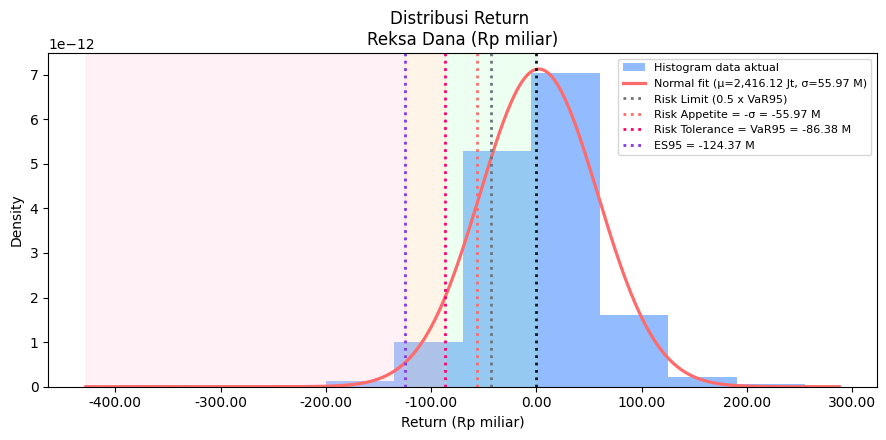

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm

# =========================
# 1. DATA & SETTINGS
# =========================

file_path = "PL_instruments.xlsx"      # ganti sesuai file
df = pd.read_excel(file_path)

ASSET_COL  = "PL_RD"               # ganti dengan nama kolom PL
ASSET_NAME = "Reksa Dana"                  # nama untuk judul

if ASSET_COL not in df.columns:
    raise ValueError(f"Kolom {ASSET_COL} tidak ditemukan di file Excel.")

series = df[ASSET_COL].dropna()

# =========================
# 2. METRIK RISIKO (α = 5%)
# =========================

alpha = 0.95
mu = series.mean()
sigma = series.std(ddof=1)

# VaR95 di ruang PL (5% kiri; biasanya negatif)
q05 = series.quantile(1 - alpha)

# Expected Shortfall 95%
losses = -series
loss_q95 = np.quantile(losses, alpha)
ES95_loss = losses[losses >= loss_q95].mean()
ES95_pl = -ES95_loss

# =========================
# 3. FORMAT Rp MILIAR
# =========================

def miliar_number(x: float) -> str:
    """Konversi rupiah ke 'Rp miliar' (dalam string, 2 desimal)."""
    return f"{x / 1e9:,.2f}"

def juta_number(x: float) -> str:
    """Konversi rupiah ke 'Rp juta' (dalam string, 2 desimal)."""
    return f"{x / 1e6:,.2f}"

axis_fmt = FuncFormatter(lambda val, pos: miliar_number(val))

# =========================
# 4. PALET WARNA
# =========================

hist_color   = "#3a86ff"
fit_color    = "#ff6b6b"
bau_color    = "#a5ffbd"   # BAU zone
ul_color     = "#ffd6a5"   # UL zone
tail_color   = "#ffc8dd"   # Tail Loss zone
var_color    = "#ff006e"
es_color     = "#8338ec"
mean_color   = "#6c757d"
sigma_color  = "#09131b"

# =========================
# 5. PLOT
# =========================

x_min = series.min()
x_max = series.max()
x_range = x_max - x_min
pad_left = x_min - 0.05 * x_range
pad_right = x_max + 0.05 * x_range

x = np.linspace(pad_left, pad_right, 400)
y = norm.pdf(x, mu, sigma)

fig, ax = plt.subplots(figsize=(9, 4.5))

# Histogram
ax.hist(series,
        bins=10,
        density=True,
        alpha=0.55,
        color=hist_color,
        label="Histogram data aktual")

# Normal fit
ax.plot(x, y,
        linewidth=2.3,
        color=fit_color,
        label=f"Normal fit (μ={juta_number(mu)} Jt, σ={miliar_number(sigma)} M)")

# Garis 0
ax.axvline(0,
           linestyle=":",
           linewidth=2,
           color=sigma_color,
            )

# Garis Risk Limit = 0.5 x q05
ax.axvline(0.5*q05,
           linestyle=":",
           linewidth=2,
           color=mean_color,
           label=f"Risk Limit (0.5 x VaR95)")

# Garis Risk Appetite = -σ
ax.axvline(-sigma,
           linestyle=":",
           linewidth=2,
           color=fit_color,
           label=f"Risk Appetite = -σ = -{miliar_number(sigma)} M")

# Garis VaR95
ax.axvline(q05,
           linestyle=":",
           linewidth=2,
           color=var_color,
           label=f"Risk Tolerance = VaR95 = {miliar_number(q05)} M")

# Garis ES95
ax.axvline(ES95_pl,
           linestyle=":",
           linewidth=2,
           color=es_color,
           label=f"ES95 = {miliar_number(ES95_pl)} M")

# === ZONA Expected Loss ===
RT_left  = q05
RT_right = 0
ax.axvspan(RT_left, RT_right,
           alpha=0.20,
           color=bau_color,
           )

# === ZONA UL: dari VaR95 ke ES95 ===
ul_left  = ES95_pl
ul_right = q05
ax.axvspan(ul_left, ul_right,
           alpha=0.25,
           color=ul_color,
           )

# === ZONA TAIL LOSS: dari ES95 ke arah kerugian yang lebih dalam ===
# (diasumsikan tail kerugian di sisi kiri, ES95_pl < q05 < mu)
tail_left  = pad_left
tail_right = ES95_pl
ax.axvspan(tail_left, tail_right,
           alpha=0.25,
           color=tail_color,
           )

# Sumbu x dalam Rp miliar
ax.xaxis.set_major_formatter(axis_fmt)

ax.set_title(f"Distribusi Return \n{ASSET_NAME} (Rp miliar)")
ax.set_xlabel("Return (Rp miliar)")
ax.set_ylabel("Density")
ax.grid(False)
ax.legend(fontsize=8, frameon=True)
plt.tight_layout()
plt.show()